In [11]:
library(kernlab)
data(spam)

set.seed(3435)
trainIndicator = rbinom(4601, size=1,prob=0.5)
table(trainIndicator)

trainIndicator
   0    1 
2314 2287 

In [12]:
trainSpam = spam[trainIndicator ==1,]
testSpam = spam[trainIndicator ==0,]
names(trainSpam)

[1] "make"              "address"           "all"              
 [4] "num3d"             "our"               "over"             
 [7] "remove"            "internet"          "order"            
[10] "mail"              "receive"           "will"             
[13] "people"            "report"            "addresses"        
[16] "free"              "business"          "email"            
[19] "you"               "credit"            "your"             
[22] "font"              "num000"            "money"            
[25] "hp"                "hpl"               "george"           
[28] "num650"            "lab"               "labs"             
[31] "telnet"            "num857"            "data"             
[34] "num415"            "num85"             "technology"       
[37] "num1999"           "parts"             "pm"               
[40] "direct"            "cs"                "meeting"          
[43] "original"          "project"           "re"               
[46] "edu"               "table"             "conference"       
[49] "charSemicolon"     "charRoundbracket"  "charSquarebracket"
[52] "charExclamation"   "charDollar"        "charHash"         
[55] "capitalAve"        "capitalLong"       "capitalTotal"     
[58] "type"

In [13]:
head(trainSpam)

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0,0.00,0.00,...,0.000,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
7,0.00,0.00,0.00,0,1.92,0.00,0.00,0,0.00,0.64,...,0.000,0.054,0,0.164,0.054,0.000,1.671,4,112,spam
9,0.15,0.00,0.46,0,0.61,0.00,0.30,0,0.92,0.76,...,0.000,0.271,0,0.181,0.203,0.022,9.744,445,1257,spam
12,0.00,0.00,0.25,0,0.38,0.25,0.25,0,0.00,0.00,...,0.022,0.044,0,0.663,0.000,0.000,1.243,11,184,spam
14,0.00,0.00,0.00,0,0.90,0.00,0.90,0,0.00,0.90,...,0.000,0.000,0,0.000,0.000,0.000,2.083,7,25,spam
16,0.00,0.42,0.42,0,1.27,0.00,0.42,0,0.00,1.27,...,0.000,0.063,0,0.572,0.063,0.000,5.659,55,249,spam


In [14]:
table(trainSpam$type)


nonspam    spam 
   1381     906 

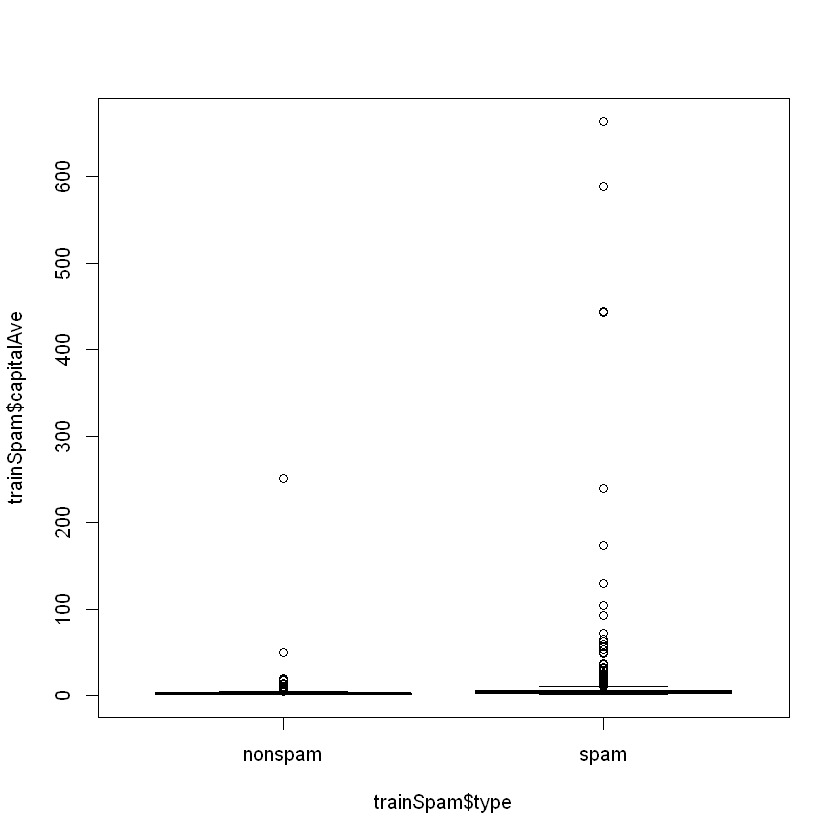

In [15]:
plot(trainSpam$capitalAve ~ trainSpam$type)

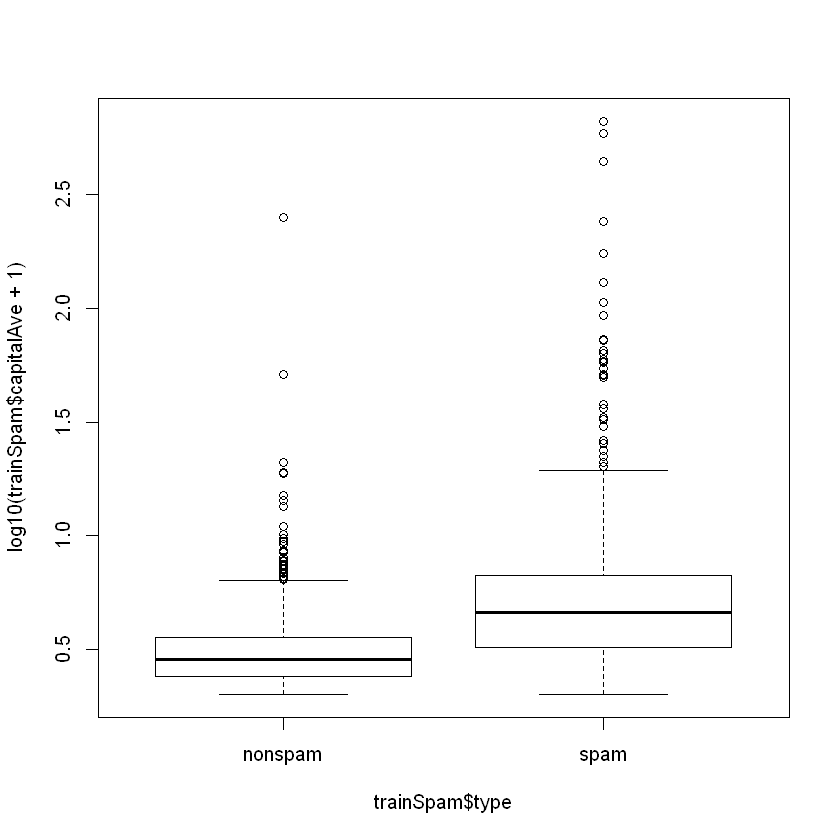

In [16]:
plot(log10(trainSpam$capitalAve + 1) ~ trainSpam$type)

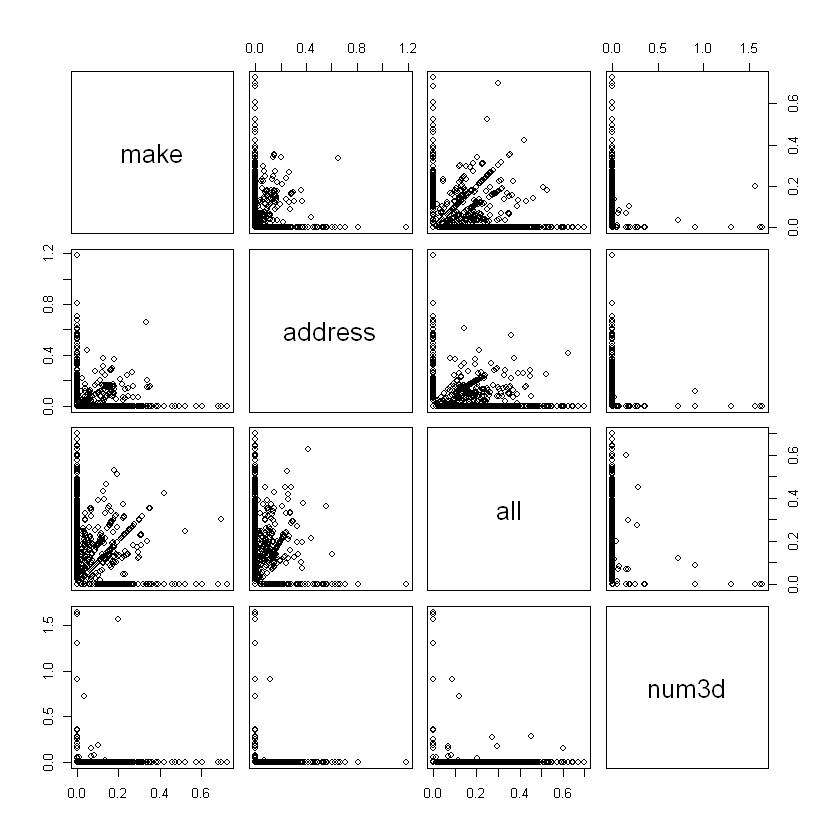

In [18]:
plot(log10(trainSpam[,1:4] + 1))

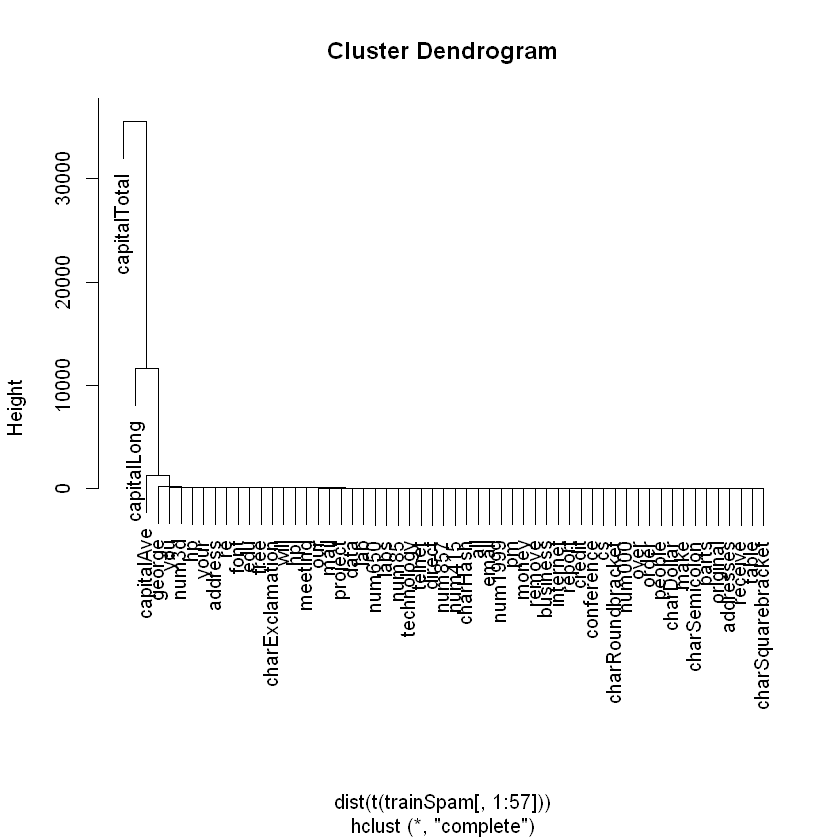

In [21]:
hCluster = hclust(dist(t(trainSpam[, 1:57])))
plot(hCluster)

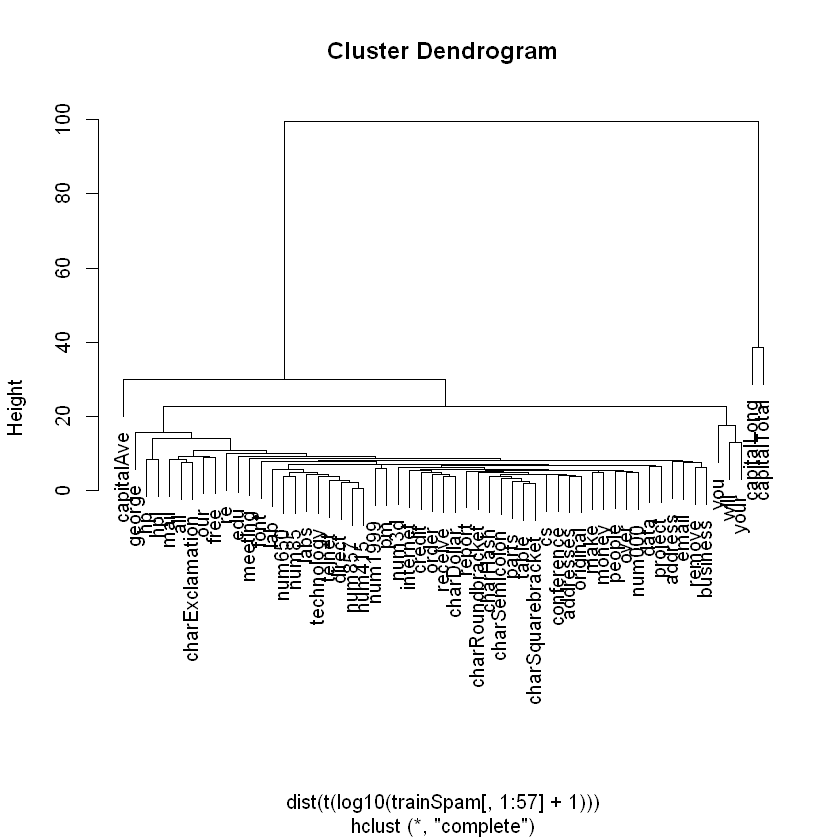

In [22]:
hClusterupdated = hclust(dist(t(log10(trainSpam[, 1:57] + 1))))
plot(hClusterupdated)

In [23]:
trainSpam$numType = as.numeric(trainSpam$type) - 1
costFunction = function(x,y) sum(x != (y > 0.5))
cvError = rep(NA, 55)
library(boot)
for (i in 1:55){
    lmFormula = reformulate(names(trainSpam)[i], response = "numType")
    glmFit = glm(lmFormula, family = "binomial", data = trainSpam)
    cvError[i] = cv.glm(trainSpam,glmFit,costFunction,2)$delta[2]
}

names(trainSpam)[which.min(cvError)]


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

[1] "charDollar"

In [24]:
predictionModel = glm(numType ~ charDollar, 
                      family = "binomial", data= trainSpam)
predictionTest = predict(predictionModel, testSpam)
predictedSpam = rep("nonspam", dim(testSpam)[1])

predictedSpam[predictionModel$fitted > 0.5] = "spam"

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


In [25]:
table(predictedSpam,testSpam$type)

             
predictedSpam nonspam spam
      nonspam    1346  458
      spam         61  449